# 문제 정의
**목표**: 통신사를 가입한 고객이 통신사를 변경할지를 예측하는 문제

**- (1)** 어떤 요소와 이탈고객과 영향이 있을까?  

**- (2)** 그 요소들이 이탈고객에게 어떠한 영향을 줄까??

#### 변수 설명
|변수|설명|
|------|---|
|state|미국 고객 거주 주|
|account_length|고객이 현재 통신사와 함께한 월 수|
|area_code|3자리 지역 코드|
|international_plan|고객이 국제적인 계획을 가지고 있는지 여부|
|voice_mail_plan|고객이 음성 메일 계획을 가지고 있는지 여부|
|number_vmail_messages|숫자, 음성 메시지 수|
|total_day_minutes|통화 총 분(낮)|
|total_day_calls|통화 총 수(낮)|
|total_day_charge|통화 총 요금(낮)|
|total_eve_minutes|통화 총 분(저녁)|
|total_eve_calls|통화 총 수(저녁)|
|total_eve_charge|통화 총 요금(저녁)|
|total_night_minutes|통화 총 분(밤)|
|total_night_calls|통화 총 수(밤)|
|total_night_charge|통화 총 요금(밤)|
|total_intl_minutes|통화 총 분(해외)|
|total_intl_calls|통화 총 수(해외)|
|total_intl_charge|통화 총 요금(해외)|
|number_customer_service_calls|숫자의 고객 서비스에 대한 통화 수|
|churn|타겟 값|

In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

In [44]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [16]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
state                            4250 non-null object
account_length                   4250 non-null int64
area_code                        4250 non-null object
international_plan               4250 non-null object
voice_mail_plan                  4250 non-null object
number_vmail_messages            4250 non-null int64
total_day_minutes                4250 non-null float64
total_day_calls                  4250 non-null int64
total_day_charge                 4250 non-null float64
total_eve_minutes                4250 non-null float64
total_eve_calls                  4250 non-null int64
total_eve_charge                 4250 non-null float64
total_night_minutes              4250 non-null float64
total_night_calls                4250 non-null int64
total_night_charge               4250 non-null float64
total_intl_minutes               4250 non-null float64
total_intl_calls           

- 모든 변수에서 결측값을 존재하지 않는다.
- int형 변수는 7개
- float형 변수는 8개
- object형 변수는 5개

# EDA

In [18]:
train["churn"].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

## **이탈 고객 특징 파악하기**

### 통신사 변경 유무에 따른 거주 주 비교

In [19]:
churn_yes = train[train['churn']=="yes"]
churn_no = train[train['churn']=="no"]

In [20]:
churn_yes.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
12,NY,161,area_code_415,no,no,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,yes
17,CO,77,area_code_408,no,no,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,yes
26,AZ,12,area_code_408,no,no,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,yes
32,MD,135,area_code_408,yes,yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,yes


In [21]:
churn_yes["state"].value_counts()

NJ    26
MD    19
WV    19
MN    19
TX    19
WA    18
MT    17
NV    17
OK    16
ME    16
NY    16
KS    15
MI    15
MS    15
OR    15
CT    15
MA    14
SC    14
IN    13
AL    13
DE    13
OH    12
KY    12
TN    12
UT    12
ID    12
SD    11
AR    11
NM    10
MO    10
VT    10
CA    10
NH    10
WY    10
FL     9
CO     9
PA     8
DC     8
NC     7
AZ     7
LA     7
WI     7
IA     7
GA     7
IL     6
RI     6
ND     6
VA     5
NE     5
AK     4
HI     4
Name: state, dtype: int64

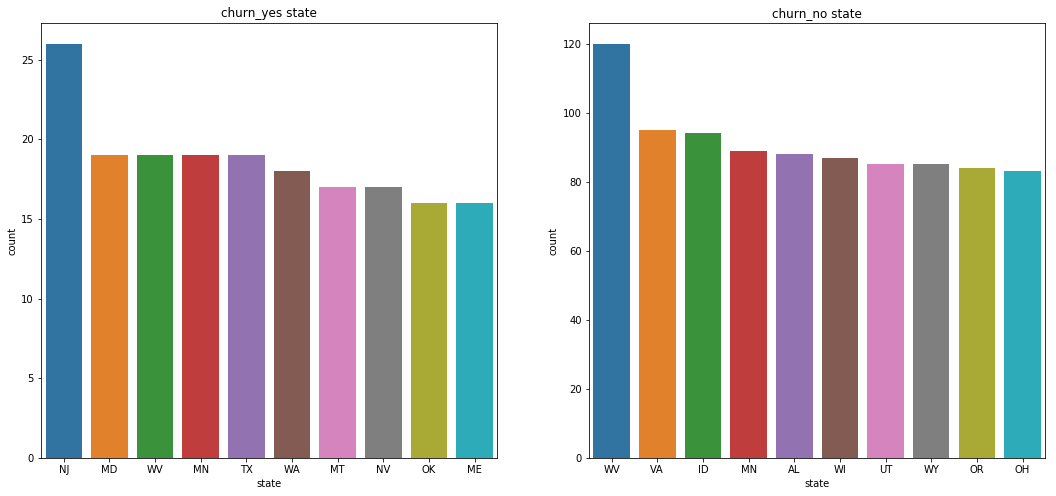

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))


sns.countplot(x = 'state',
              data = churn_yes,
              ax = ax[0],
              order = churn_yes['state'].value_counts()[:10].index)
# plt.xticks(rotation=90)
ax[0].set_title('churn_yes state')
ax[0].set_ylabel('count')


sns.countplot(x = 'state',
              data = churn_no,
              ax = ax[1],
              order = churn_no['state'].value_counts()[:10].index)
ax[1].set_title('churn_no state')
ax[1].set_ylabel('count')
plt.show()

- **통신사를 바꾼 고객**이 거주하는 상위 주는 New Jersey, West Virginia, Minnesota 등이다.
- **통신사를 바꾸지 않은 고객**이 거주하는 상위 주는 West Virginia, Virginia , Idaho 등이다.

통시사 변경 유무에 따라 고객들이 주로 거주하는 주에는 차이가 있다.

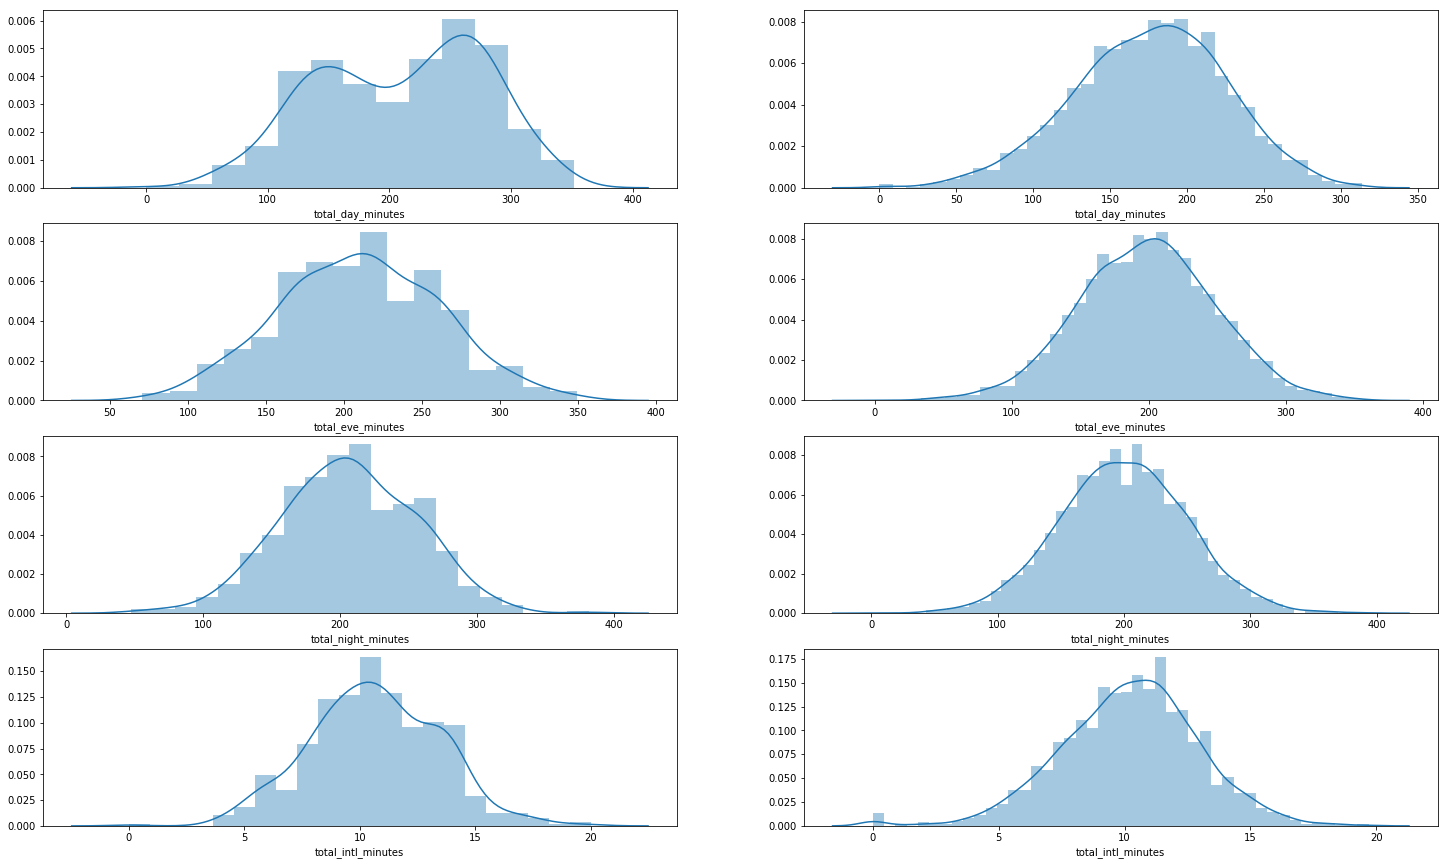

In [23]:
f, ax = plt.subplots(4, 2, figsize=(25, 15))

sns.distplot(churn_yes['total_day_minutes'],ax = ax[0,0])
sns.distplot(churn_no['total_day_minutes'],ax = ax[0,1])

sns.distplot(churn_yes['total_eve_minutes'],ax = ax[1,0])
sns.distplot(churn_no['total_eve_minutes'],ax = ax[1,1])

sns.distplot(churn_yes['total_night_minutes'],ax = ax[2,0])
sns.distplot(churn_no['total_night_minutes'],ax = ax[2,1])

sns.distplot(churn_yes['total_intl_minutes'],ax = ax[3,0])
sns.distplot(churn_no['total_intl_minutes'],ax = ax[3,1])

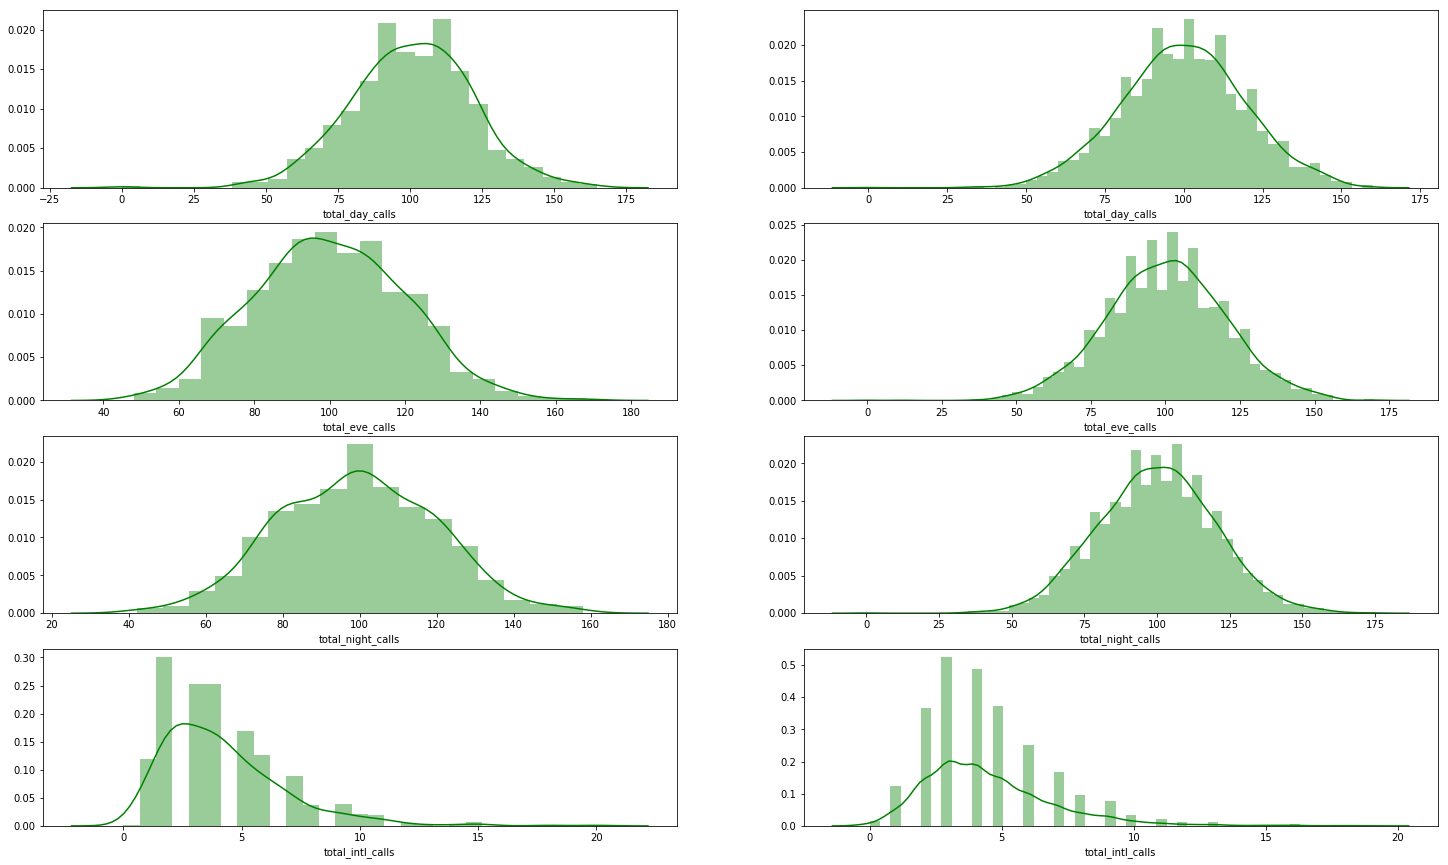

In [34]:
f, ax = plt.subplots(4, 2, figsize=(25, 15))

sns.distplot(churn_yes['total_day_calls'],ax = ax[0,0],color="green")
sns.distplot(churn_no['total_day_calls'],ax = ax[0,1],color="green")

sns.distplot(churn_yes['total_eve_calls'],ax = ax[1,0],color="green")
sns.distplot(churn_no['total_eve_calls'],ax = ax[1,1],color="green")

sns.distplot(churn_yes['total_night_calls'],ax = ax[2,0],color="green")
sns.distplot(churn_no['total_night_calls'],ax = ax[2,1],color="green")

sns.distplot(churn_yes['total_intl_calls'],ax = ax[3,0],color="green")
sns.distplot(churn_no['total_intl_calls'],ax = ax[3,1],color="green")

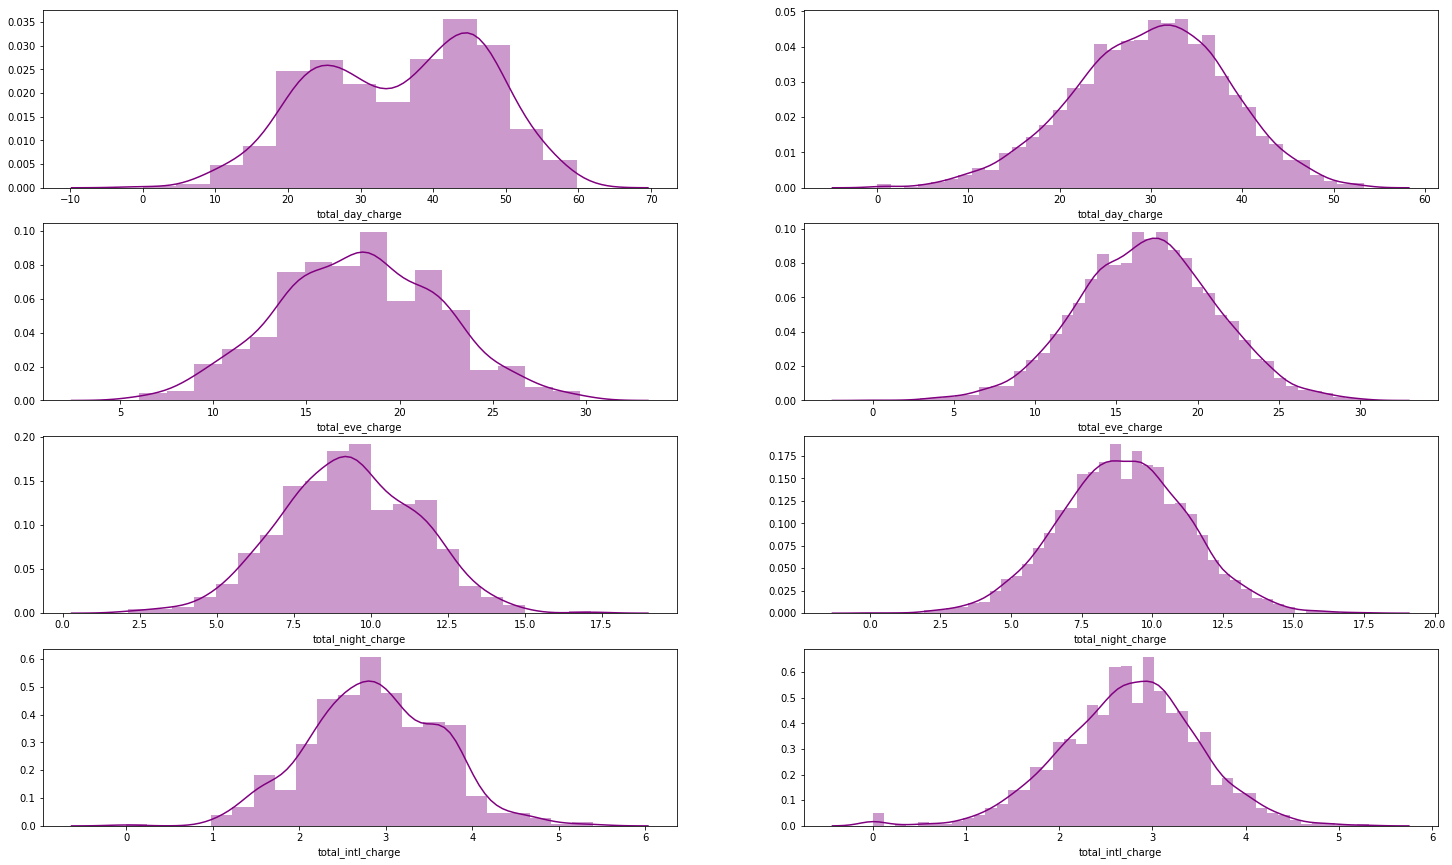

In [35]:
f, ax = plt.subplots(4, 2, figsize=(25, 15))

sns.distplot(churn_yes['total_day_charge'],ax = ax[0,0],color="purple")
sns.distplot(churn_no['total_day_charge'],ax = ax[0,1],color="purple")

sns.distplot(churn_yes['total_eve_charge'],ax = ax[1,0],color="purple")
sns.distplot(churn_no['total_eve_charge'],ax = ax[1,1],color="purple")

sns.distplot(churn_yes['total_night_charge'],ax = ax[2,0],color="purple")
sns.distplot(churn_no['total_night_charge'],ax = ax[2,1],color="purple")

sns.distplot(churn_yes['total_intl_charge'],ax = ax[3,0],color="purple")
sns.distplot(churn_no['total_intl_charge'],ax = ax[3,1],color="purple")

# 데이터 전처리

## object형 타입 변경하기

In [24]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [45]:
le = LabelEncoder()
train["state"] = le.fit_transform(train['state'])
test["state"] = le.fit_transform(test['state'])

In [46]:
train["area_code"] = train["area_code"].str.slice(10,)
test["area_code"] = test["area_code"].str.slice(10,)
#train["area_code"].head()

In [47]:
train["area_code"] = le.fit_transform(train['area_code'])
test["area_code"] = le.fit_transform(test['area_code'])

In [48]:
train = pd.get_dummies(train, columns = ['international_plan'])
test = pd.get_dummies(test, columns = ['international_plan'])

In [49]:
train = pd.get_dummies(train, columns = ['voice_mail_plan'])
test = pd.get_dummies(test, columns = ['voice_mail_plan'])

# 모델링

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 25 columns):
state                            4250 non-null int32
account_length                   4250 non-null int64
area_code                        4250 non-null int32
number_vmail_messages            4250 non-null int64
total_day_minutes                4250 non-null float64
total_day_calls                  4250 non-null int64
total_day_charge                 4250 non-null float64
total_eve_minutes                4250 non-null float64
total_eve_calls                  4250 non-null int64
total_eve_charge                 4250 non-null float64
total_night_minutes              4250 non-null float64
total_night_calls                4250 non-null int64
total_night_charge               4250 non-null float64
total_intl_minutes               4250 non-null float64
total_intl_calls                 4250 non-null int64
total_intl_charge                4250 non-null float64
number_customer_service_calls

In [50]:
train.columns

Index(['state', 'account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'international_plan_no',
       'international_plan_yes', 'voice_mail_plan_no', 'voice_mail_plan_yes'],
      dtype='object')

## 입력변수간 상관관계 파악하기

In [52]:
input_var = ['state', 'account_length', 'area_code', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls','international_plan_no',
       'international_plan_yes', 'voice_mail_plan_no', 'voice_mail_plan_yes']

In [53]:
corr = train[input_var].corr()

In [54]:
corr.style.background_gradient(cmap="coolwarm")

,state,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
state,1,0.00881757,0.0207126,-0.0308568,0.0142633,-0.00988986,0.0142622,0.00160298,-0.0091157,0.00160336,0.00482708,-0.0065974,0.0048151,-0.0102596,0.007469,-0.0102839,-0.0204214,-0.00382218,0.00382218,0.0347523,-0.0347523
account_length,0.00881757,1,-0.0235301,-0.00662645,-0.00161156,0.023002,-0.00161345,-0.0103258,0.00553543,-0.0103218,-0.00991613,-0.00184637,-0.00994209,0.00453875,0.0136905,0.00449433,0.00100223,-0.0270499,0.0270499,-0.00166297,0.00166297
area_code,0.0207126,-0.0235301,1,-0.00246761,0.00634402,-0.00906389,0.00634235,-0.00024397,-0.0140315,-0.000228922,0.0190336,0.0228686,0.0190308,0.0136412,-0.00702652,0.0135182,0.0110641,-0.0271328,0.0271328,0.00162175,-0.00162175
number_vmail_messages,-0.0308568,-0.00662645,-0.00246761,1,0.00199971,-0.00692049,0.00199438,0.0107251,0.00359326,0.0107357,0.0183079,0.00197732,0.0182996,0.00521988,0.00658515,0.00524862,-0.0153033,-0.00480806,0.00480806,-0.954014,0.954014
total_day_minutes,0.0142633,-0.00161156,0.00634402,0.00199971,1,0.000746506,1,-0.013248,0.00598583,-0.0132583,0.0100491,-0.00481221,0.0100363,-0.0213691,0.00385851,-0.0212912,-0.00292456,-0.0400594,0.0400594,0.000652982,-0.000652982
total_day_calls,-0.00988986,0.023002,-0.00906389,-0.00692049,0.000746506,1,0.000750554,0.00866139,0.00373897,0.00866325,0.00220617,-0.00481549,0.00219951,0.00883401,0.00937656,0.00890928,-0.0158454,-0.00977593,0.00977593,0.0100038,-0.0100038
total_day_charge,0.0142622,-0.00161345,0.00634235,0.00199438,1,0.000750554,1,-0.0132471,0.00598509,-0.0132575,0.0100532,-0.00481568,0.0100404,-0.0213742,0.0038535,-0.0212963,-0.00293178,-0.0400609,0.0400609,0.000658113,-0.000658113
total_eve_minutes,0.00160298,-0.0103258,-0.00024397,0.0107251,-0.013248,0.00866139,-0.0132471,1,0.00310081,1,-0.0140181,0.0119732,-0.0140309,-0.00350948,0.0122388,-0.00346043,-0.0100631,-0.0234836,0.0234836,-0.0119824,0.0119824
total_eve_calls,-0.0091157,0.00553543,-0.0140315,0.00359326,0.00598583,0.00373897,0.00598509,0.00310081,1,0.00311972,0.00842519,-0.0119288,0.00844088,-0.0130959,0.00494942,-0.0131453,0.0069563,0.00300433,-0.00300433,-0.000262598,0.000262598
total_eve_charge,0.00160336,-0.0103218,-0.000228922,0.0107357,-0.0132583,0.00866325,-0.0132575,1,0.00311972,1,-0.0140225,0.0119714,-0.0140352,-0.00351191,0.0122394,-0.00346289,-0.0100708,-0.0234791,0.0234791,-0.0119893,0.0119893


- voice_mail_plan_yes, number_vmail_messages  
- total_night_charge, total_night_minutes
- ttotal_intl_charge, total_intl_minutes  
**다음과 같이 상관관계가 높은 변수들을 같이 입력하여 예측하면 정확도가 떨어지기 때문에 두개 중 하나를 선택할 필요가 있다**

In [58]:
train["churn2"] = le.fit_transform(train['churn']) # 상관관계 파악을 위해 변경

In [64]:
train["number_vmail_messages"].corr(train["churn2"])

-0.1003465278887836

In [65]:
train["voice_mail_plan_yes"].corr(train["churn2"])

-0.11464257735226924

**voice_mail_plan_yes 선택**

In [66]:
train["total_night_charge"].corr(train["churn2"])

0.04664097076937198

In [67]:
train["total_night_minutes"].corr(train["churn2"])

0.046647182635507364

**total_night_minutes 선택**

In [68]:
train["total_intl_charge"].corr(train["churn2"])

0.055176611642417515

In [70]:
train["total_intl_minutes"].corr(train["churn2"])

0.05518578653026759

**total_intl_minutes 선택**

In [71]:
input_var = ['state', 'account_length', 'area_code',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls',
       'total_intl_minutes', 'total_intl_calls', 
       'number_customer_service_calls','international_plan_no',
       'international_plan_yes', 'voice_mail_plan_no', 'voice_mail_plan_yes']

## 모델 학습

In [72]:
from xgboost import XGBClassifier

In [85]:
model = XGBClassifier(n_estimators=100,learning_rate=0.1)
model.fit(train[input_var],train['churn'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

## shape.value

In [74]:
import shap

In [86]:
shap_values = shap.TreeExplainer(model).shap_values(train[input_var])

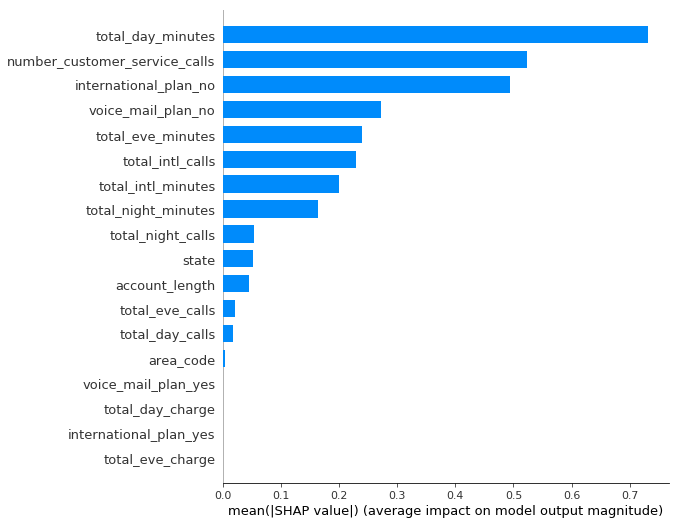

In [76]:
shap.summary_plot(shap_values,train[input_var],plot_type='bar')

**상위 6개 변수를 사용**

In [92]:
input_var = ['total_day_minutes','number_customer_service_calls',
             'international_plan_no','voice_mail_plan_no','total_eve_minutes',
             'total_intl_calls']

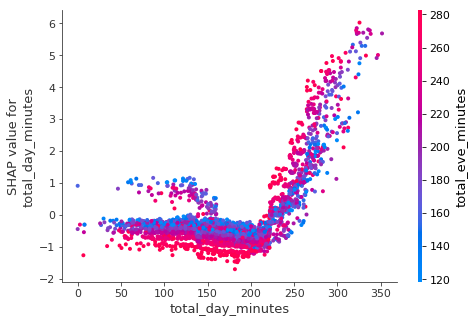

In [94]:
shap.dependence_plot('total_day_minutes',shap_values,train[input_var])

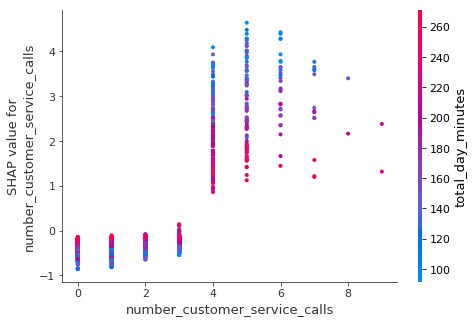

In [95]:
shap.dependence_plot('number_customer_service_calls',shap_values,train[input_var])

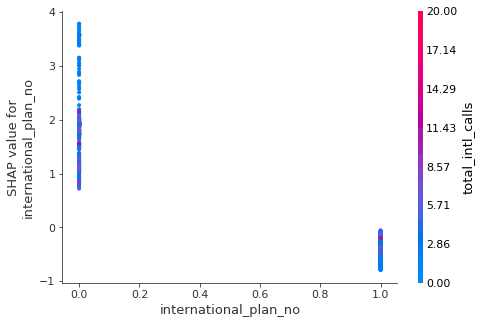

In [96]:
shap.dependence_plot('international_plan_no',shap_values,train[input_var])

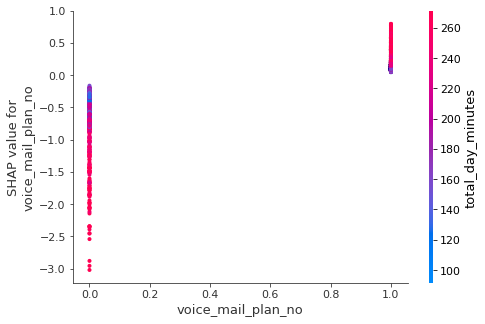

In [97]:
shap.dependence_plot('voice_mail_plan_no',shap_values,train[input_var])

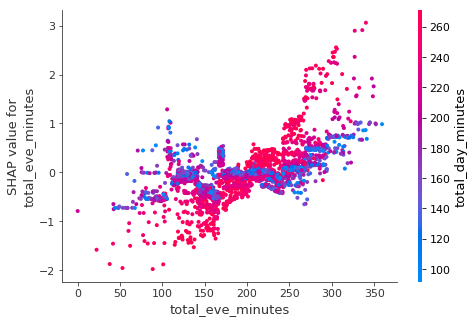

In [98]:
shap.dependence_plot('total_eve_minutes',shap_values,train[input_var])

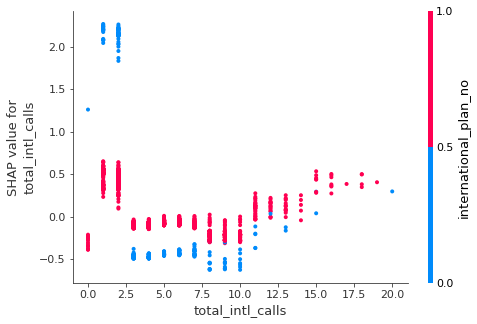

In [99]:
shap.dependence_plot('total_intl_calls',shap_values,train[input_var])

In [100]:
test["churn"] = model.predict(test[input_var])

In [101]:
test['churn'].value_counts()

no     668
yes     82
Name: churn, dtype: int64

In [102]:
test['id']=range(len(test))

In [103]:
test[['id','churn']].to_csv("./Submission4.csv")

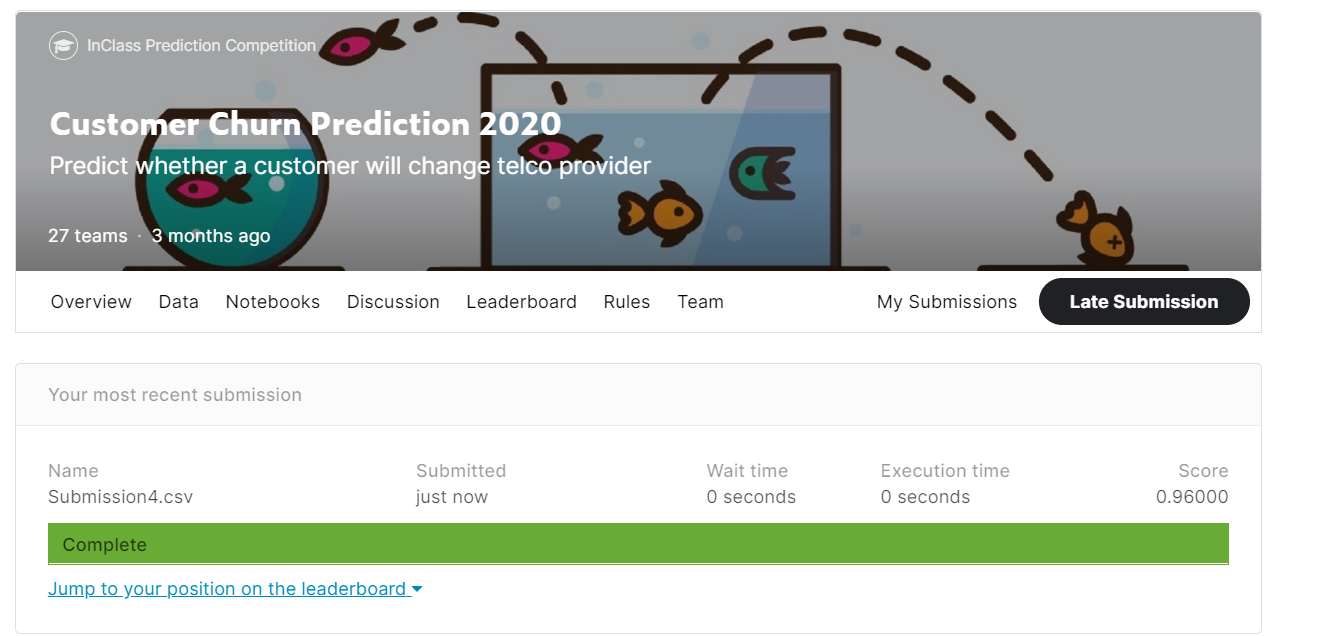

In [106]:
Image("./score.PNG")